## Виды машинного обучения:

1. Обучение с учителем (когда даны данные для обучения, а также верные ответы, соответствующие данным для обучения)
2. Обучение без учителя (даны данные для обучения и нам нужно разделить их на классы, или предсказать какое-то значение при том, что мы не можем проверить себя на правильных ответа)
3. Обучение с подкреплением (модель обучается без правильных ответов, предсказывает значения, а затем получает обратную связь о том, какие значения и насколько точно были предсказаны, после чего проводит обучение и предсказание заново)

Машинное обучение основано на:
* Набор данных (то на чем мы обучаем модель)
* Признаках (факторы данных и целевая переменная)
* Модель (математический алгоритм для поиска связей в данных)

Функции ошибки для регрессии:

**MAE (mean absolute error)** - средняя абсолютная ошибка. Считается как сумма модулей разниц между реальным значением данных и предсказания, разделенная их количество.

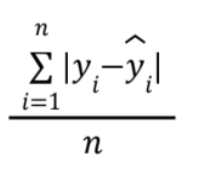

**MAPE (mean absolute percentage error)** - считается как сумма разницы между модулем реального значения данных и предсказанием, разделенным на реальное значение, а также умноженного на 100% и деленное на число предсказаний.

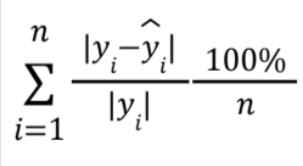

**MSE (mean square error)** - сумма квадратов разницы между реальным значением и предсказанным, разделенное на число предсказаний

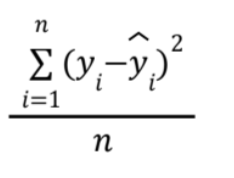

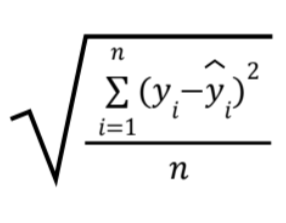

Для рассчета метрик используем библиотеку Sklearn

In [1]:
from sklearn import metrics

true = [10, 12, 8, 14, 15, 13, 18, 20]
pred = [12, 12, 9, 8, 12, 10, 14, 16]

MAE = metrics.mean_absolute_error(y_true=true, y_pred=pred)
MSE = metrics.mean_squared_error(y_true=true, y_pred=pred)
MAPE = metrics.mean_absolute_percentage_error(y_true=true, y_pred=pred)

print(f'Ошибки предсказания нашей модели составляют:\nMAE: {MAE}, MSE: {MSE}, MAPE: {round(MAPE*100, 3)}%')

Ошибки предсказания нашей модели составляют:
MAE: 2.875, MSE: 11.375, MAPE: 20.082%


ДЗ:
1. Прочитать информацию по метрикам регрессии
2. Протестировать код с метриками + RMSE (найти как получить метрику)
3. Прочитать про Rˆ2 и то для чего он нужен
4. Метод наименьших квадратов в ML - по желанию

## Машинное обучение

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Foxford/Андрей/titanic_to_ml.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3,Age_Male,Age_Female,Sex_Male,Sex_Female
0,0,22,7.25,0,0,1,1,0,0,0,1,1,0
1,1,38,71.28,1,0,0,0,1,0,0,1,0,1
2,1,26,7.92,0,0,1,1,0,0,0,1,0,1
3,1,35,53.10,1,0,0,1,0,0,0,1,0,1
4,0,35,8.05,0,0,1,1,0,0,0,1,1,0


### Метод наименьших квадратов

In [4]:
from sklearn import linear_model

In [5]:
X = data.drop('Survived', axis=1) # все признаки кроме искомого составляют данные для обучения
y = data['Survived'] # искомый признак

# создаем модель
model = linear_model.LinearRegression()
# обучаем модель
model.fit(X, y)

LinearRegression()

Коэффициенты для уранения регрессии:

y = kx + b - математика

y = w1*X + w0 - для ML

In [6]:
print('w0: {} - коэффициент-показатель смещения уравнения модели'.format(model.intercept_))
print('w1: {} - коэффициенты-показатели коэффициента наклона уравнения модели'.format(model.coef_))

w0: 0.6745668331062238 - коэффициент-показатель смещения уравнения модели
w1: [-4.49426877e-03  2.27014063e-05  1.71364477e-01  1.53649974e-02
 -1.86729474e-01 -5.30655275e-02  2.68959119e-02  2.61696156e-02
  3.08174753e-01  0.00000000e+00 -2.46015335e-01  2.46015335e-01] - коэффициенты-показатели коэффициента наклона уравнения модели


In [7]:
# предскажем y на нашей модели
y_predict = model.predict(X)


In [8]:
# Код для визуализации предсказания и значений данных
import matplotlib.pyplot as plt
import seaborn as sns

def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.scatter(X, y_true, alpha=0.7, label='Данные по умолчанию')
  ax.plot(X, y_predict, color='red', label='График регрессии')
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.legend(facecolor='white', fontsize=10)


## Что будет, если выбрать неправильную модель

In [9]:
model2 = linear_model.LinearRegression()
X2 = data[['Age', 'Fare']]
y2 = data['Survived']
model2.fit(X2, y2)

predict2 = model2.predict(X2)

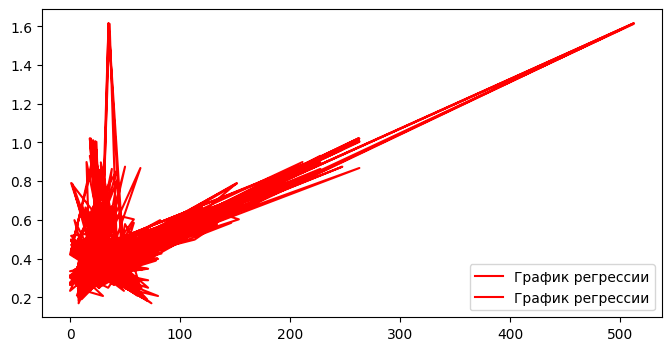

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X2, predict2, color='red', label='График регрессии');
ax.legend(facecolor='white', fontsize=10);

In [11]:
from sklearn import metrics

print('Метрики MAE: {}, MAPE: {}, MSE: {}'.format(
    metrics.mean_absolute_error(y2, predict2),
    metrics.mean_absolute_percentage_error(y2, predict2),
    metrics.mean_squared_error(y2, predict2)
))

Метрики MAE: 0.4421066383267357, MAPE: 985998776470477.4, MSE: 0.2189357087779514


## Логистическая регрессия

In [12]:
log_reg = linear_model.LogisticRegression(random_state=42)

X = data.drop('Survived', axis=1)
y = data['Survived']

log_reg.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [13]:
y_pred = log_reg.predict(X)

print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



ДЗ на 09.08

1. Изучить метрики классификации Recall, Precision, f1-score, accuracy
2. Посмотреть информацию о математическом обосновании логистической регрессии

In [14]:
model3 = linear_model.LinearRegression()
y = data['Age']
X = data[['Fare']]

model3.fit(X, y)

y_pred3 = model3.predict(X)

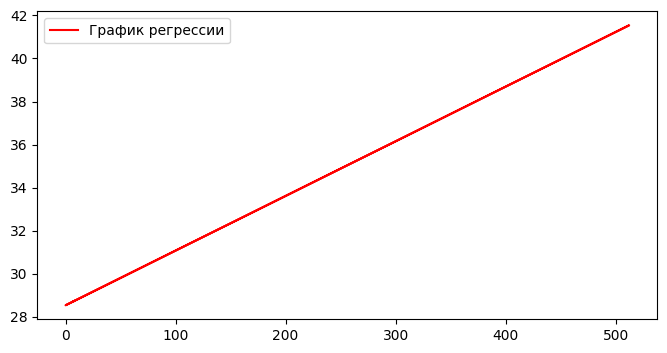

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X, y_pred3, color='red', label='График регрессии');
ax.legend(facecolor='white', fontsize=10);

## Обучение модели на 2 признаках

In [16]:
X = data[['Age', 'Fare']]
y = data['Survived']

log_reg = linear_model.LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

In [17]:
def plot_probabilities_2d(X, y, model):
  xx1, xx2 = np.meshgrid(
      np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
      np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1),
  )

  X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])

  probs = model.predict_proba(X_net)[:, 1]
  probs = probs.reshape(xx1.shape)

  fig, ax = plt.subplots(figsize=(17, 9))

  contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')

  bound = ax.contour(xx1, xx2, probs, [0.5], linewidth=2, colors='black')

  colorbar = fig.colorbar(contour)

  sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)

  ax.set_title('Диаграмма рассеяния объектов с разделяющей прямой');

  ax.legend(bbox_to_anchor=(-0.05, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-17-625ccd9cd21f>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  bound = ax.contour(xx1, xx2, probs, [0.5], linewidth=2, colors='black')


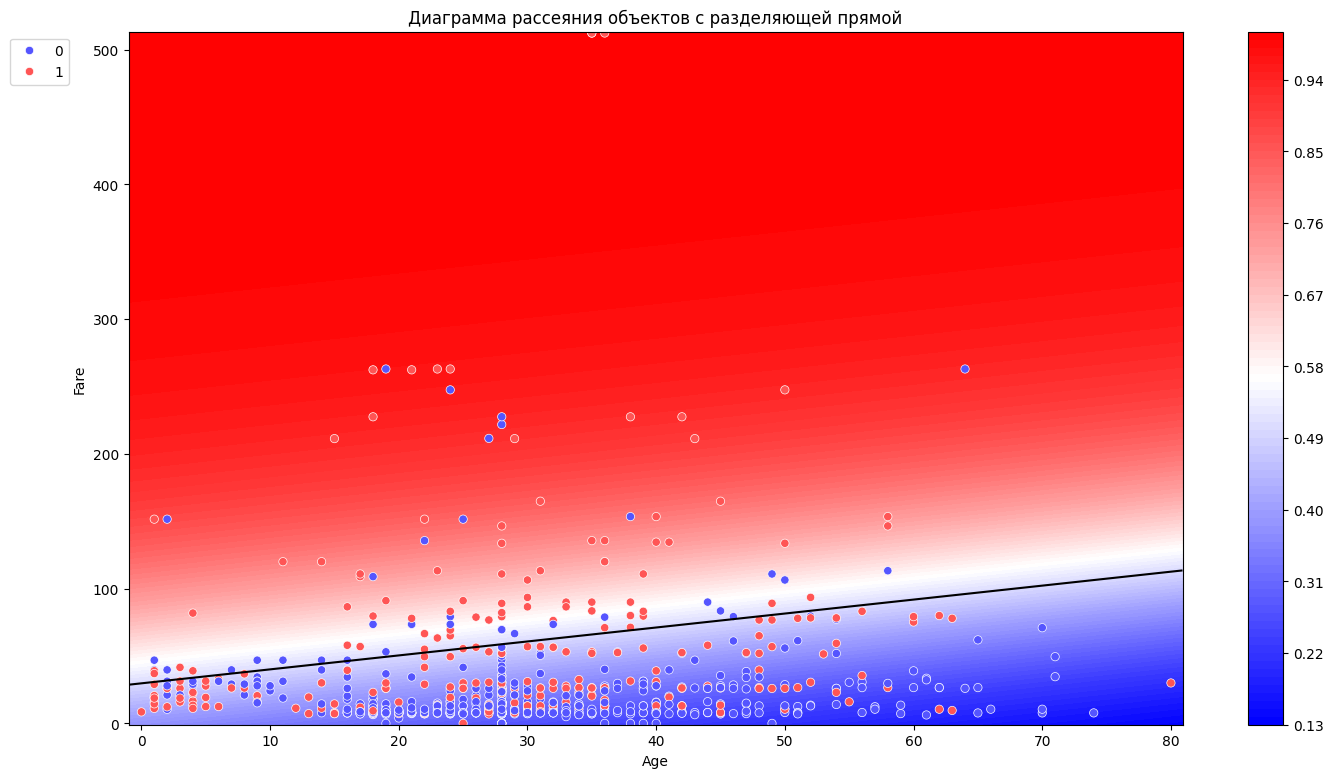

In [18]:
plot_probabilities_2d(X, y, log_reg)

## Разделение выборки

50% данные - данные для обучения модели

30% данных - данные для валидации

20% данных - данные для предсказания

<Axes: xlabel='Survived'>

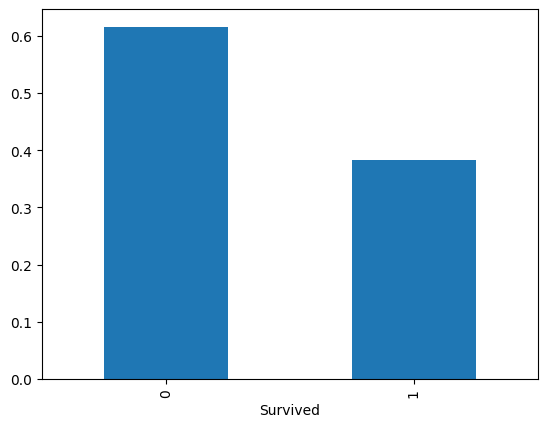

In [19]:
data['Survived'].value_counts(normalize=True).plot(kind='bar')

In [20]:
from sklearn.model_selection import train_test_split

# получим тестовые и тренировочные данные
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, # обучающие данные модели
                                                    y, # целевая переменная
                                                    test_size=0.2, # размер тестовой выборки в долях от единицы
                                                    random_state=42, # фиксация случайных чисел для разбиения выборки
                                                    stratify=y) # разделение данных в соотношении идентичного искомому признаку

In [21]:
model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.72      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [23]:
print(list(y_test).count(0)/len(list(y_test)),
list(y_test).count(1)/len(list(y_test)))

0.6145251396648045 0.3854748603351955


ДЗ на 12.08:
1. Запустить код, попробовать поменять размер выборки в train_test_split и посмотреть влияние размера выборки на метрики
2. Прочитать про деревья решений и их математическое обоснование

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, # обучающие данные модели
                                                    y, # целевая переменная
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y) # разделение данных в соотношении идентичного искомому признаку

In [35]:
model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.72      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



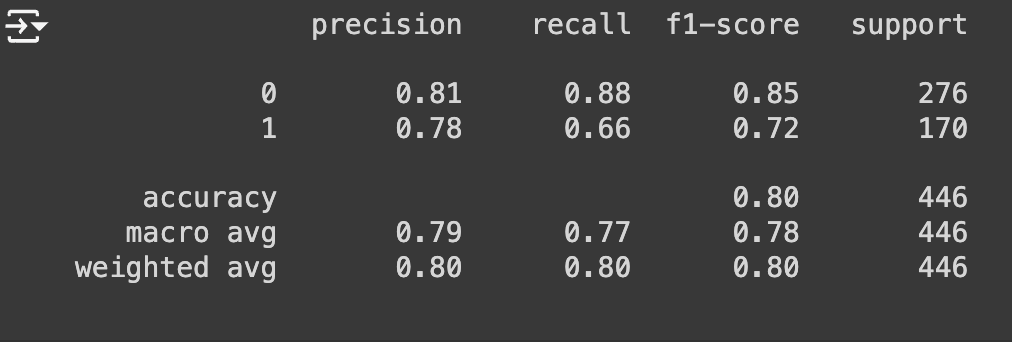

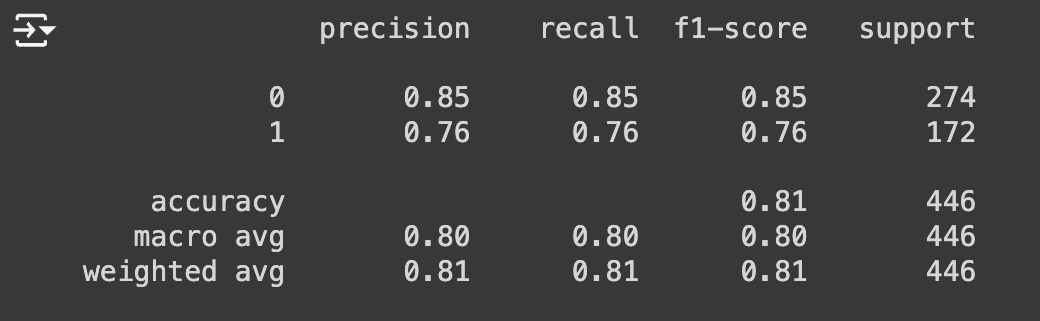

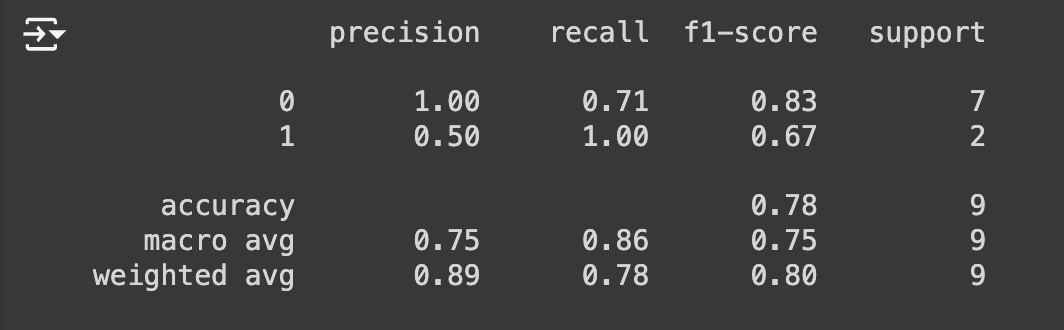

## Деревья решений

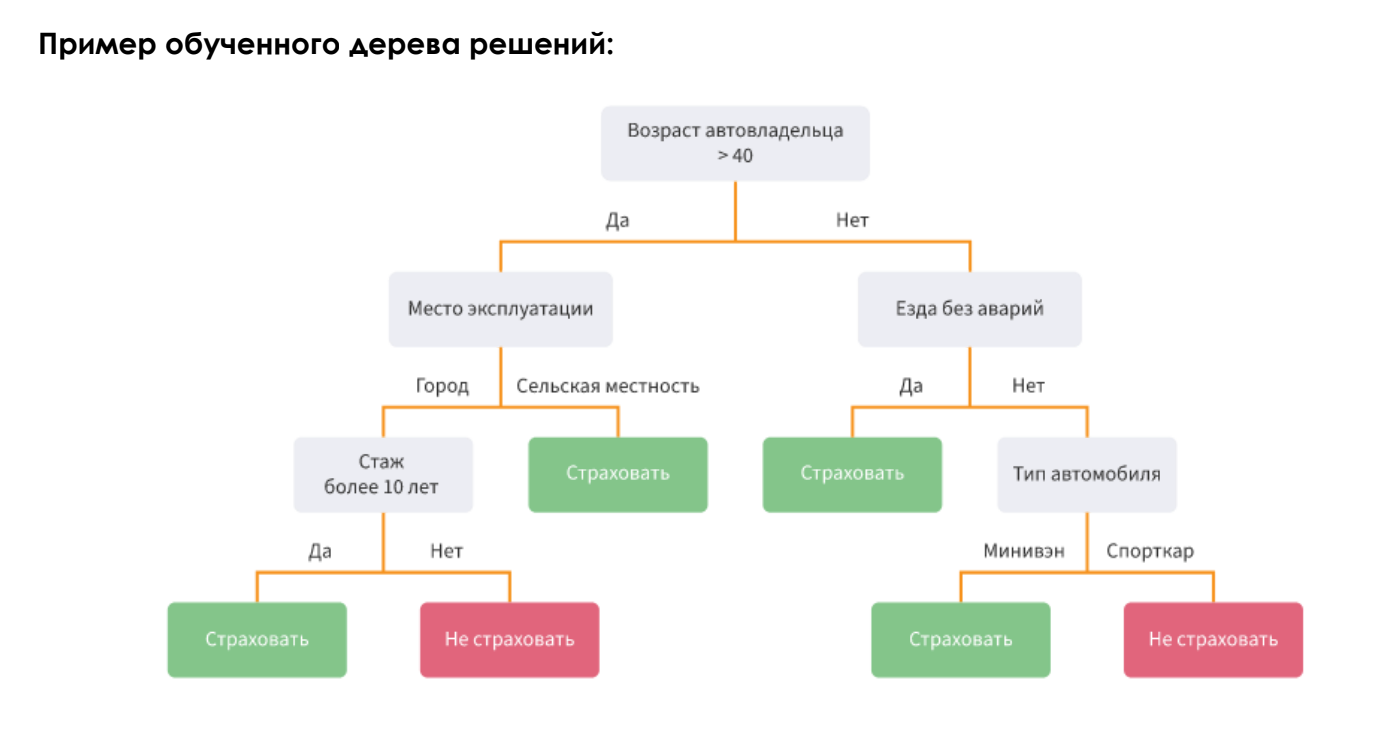

In [39]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [37]:
# импорт класса, содержащего в себе модели деревьев решений
from sklearn import tree
# инициализируем дерево решений - DecisionTreeClassifier
dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)
# обучаем модель
dt_clf.fit(X, y)
# получаем предсказание
y_predict = dt_clf.predict(X)
# выведем информацию о качестве классификации
print(metrics.classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       549
           1       0.83      0.75      0.79       342

    accuracy                           0.85       891
   macro avg       0.84      0.83      0.83       891
weighted avg       0.85      0.85      0.84       891



Добавим разбиение данных

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, # обучающие данные модели
                                                    y, # целевая переменная
                                                    test_size=0.2,
                                                    random_state=42) # разделение данных в соотношении идентичного искомому признаку

dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    random_state=42
)
# обучаем модель
dt_clf.fit(X_train, y_train)
# получаем предсказание
y_predict = dt_clf.predict(X_test)
# выведем информацию о качестве классификации
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [57]:
y_predict_proba = dt_clf.predict_proba(X_test)
display(y_predict_proba)

array([[0.87649402, 0.12350598],
       [0.87649402, 0.12350598],
       [0.87649402, 0.12350598],
       [0.        , 1.        ],
       [0.37931034, 0.62068966],
       [0.16666667, 0.83333333],
       [0.37931034, 0.62068966],
       [0.87649402, 0.12350598],
       [0.37931034, 0.62068966],
       [0.        , 1.        ],
       [0.65853659, 0.34146341],
       [0.91935484, 0.08064516],
       [1.        , 0.        ],
       [0.87649402, 0.12350598],
       [0.91935484, 0.08064516],
       [0.        , 1.        ],
       [0.65853659, 0.34146341],
       [0.37931034, 0.62068966],
       [0.87649402, 0.12350598],
       [0.65853659, 0.34146341],
       [0.87649402, 0.12350598],
       [0.65853659, 0.34146341],
       [0.54901961, 0.45098039],
       [0.87649402, 0.12350598],
       [0.87649402, 0.12350598],
       [0.87649402, 0.12350598],
       [0.65853659, 0.34146341],
       [0.87649402, 0.12350598],
       [0.66666667, 0.33333333],
       [0.54901961, 0.45098039],
       [0.

## Визуализация дерева решений

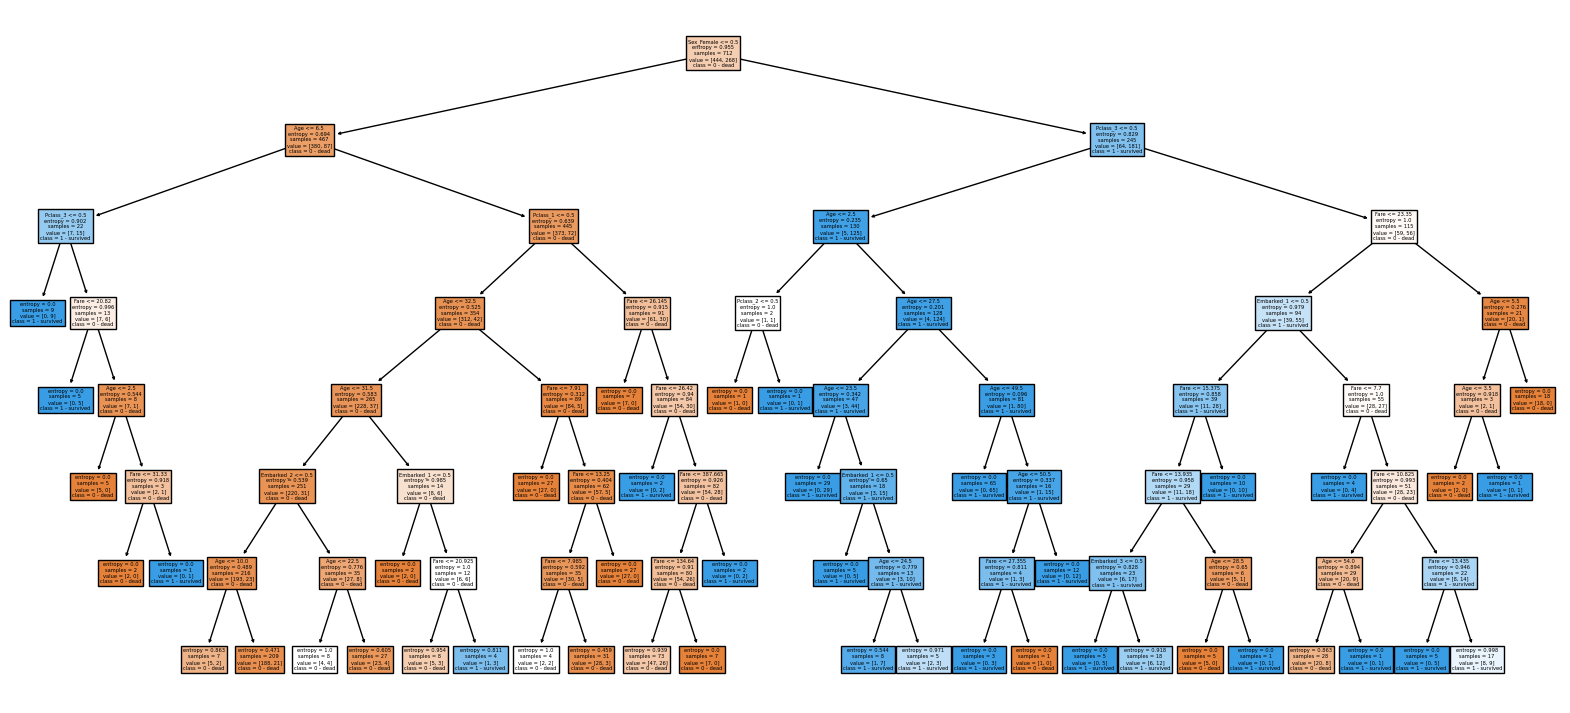

In [63]:
fig, ax = plt.subplots(figsize=(20, 9))

tree.plot_tree(
    dt_clf,
    feature_names=X.columns,
    class_names=['0 - dead', '1 - survived'],
    filled=True,
    ax=ax
);